# Brewery Review NLP Workbook

The purpose of this notebook is to discover and demonstrate the NLP pipeline we will use to process brewery reviews into short phrases.

## Examples from Google Maps

* Mike Hess Brewing, North Park - Modern, family-friendly hangout featuring a tasting room, board games & brewery views.
* North Park Beer Company - Spacious brewery & taproom serving San Diego-style ales & lagers amid dapper decor.
* Rip Current Brewing North Park - This chill, wood-paneled joint with a roomy bar offers pub grub & house-brewed craft beers on tap.

## Notes

* Sentiment - Only analyze positive sentiment reviews for the descriptions. Though it might be interesting to experiement with including both positive and negative reviews.
* Opinions - Some reviews include only opinions about a place and may not be accurate or useful. 
* Named Entity Recognition - This will be interesting to process to see if the models are able to match the right entities.
* Context-free Grammar - The Google Maps are somewhat predictable in their structure so I wonder if they generate those senteces with a pre-defined grammar. 
* Beer Styles - Beer Advocate has current beers and style so it will be straight-forward to scrape the most popular styles to include with the descriptions. 
* Natural Language Generation (NLG) - How to generate the sentences or phrases so that they make sense?
* Markov Chains - Simple solution might be to use [`markovify`](https://github.com/jsvine/markovify) to do the simple generation. It will be very dependant on the reviewer's writing style, but combining all into one might regularize.

In [1]:
import pandas as pd
import markovify
import spacy
from spacy import displacy
import markovify
from textblob import TextBlob

In [2]:
with open('reviews_san-diego_half-door-brewing-co.txt') as file:
    reviews = file.readlines()
reviews[:3]

['Nice old fashion building. I love the door knobs for beer taps. The beer selection offers over ten taps. The bar was rented for the night for an association I belong to. There were a couple of hot banquet offerings. They were slightly different and pretty good flavor. The service was good for the event.\n',
 "This place feels more like a bar than a restaurant, but they do pour their own and other it in flights. Located blocks from Petco Park with an inviting porch, it definitely caters to Padres fans and out-of-towners in for a visit. I can't say I loved the beers I had there, but the bartender was helpful an courteous and Half Door was a more than inviting place to kill a happy hour.\n",
 'Old converted house in downtown with porch/ patio seating. L-shaped bar seats about 15... additional seat around. 16 beers on tap, half theirs, half local guests... nice mix. Friendly local vibe. Good service. Very tasty food.\n']

In [3]:
# Inspect spaCy's tokens
nlp = spacy.load("en_core_web_sm")
doc = nlp(reviews[0])
for token in doc[:20]:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_alpha, token.is_stop)

Nice nice ADJ JJ amod Xxxx True False
old old ADJ JJ amod xxx True False
fashion fashion NOUN NN compound xxxx True False
building building NOUN NN ROOT xxxx True False
. . PUNCT . punct . False False
I -PRON- PRON PRP nsubj X True True
love love VERB VBP ROOT xxxx True False
the the DET DT det xxx True True
door door NOUN NN compound xxxx True False
knobs knob VERB VBZ dobj xxxx True False
for for ADP IN prep xxx True True
beer beer NOUN NN compound xxxx True False
taps tap NOUN NNS pobj xxxx True False
. . PUNCT . punct . False False
The the DET DT det Xxx True True
beer beer NOUN NN compound xxxx True False
selection selection NOUN NN nsubj xxxx True False
offers offer VERB VBZ ROOT xxxx True False
over over ADP IN prep xxxx True True
ten ten NUM CD nummod xxx True True


In [4]:
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

ten 95 98 CARDINAL
the night 128 137 TIME


In [5]:
noun_chunks = list(doc.noun_chunks)
for chunk in noun_chunks:
    print(chunk.text)

print("\nSentences")
print("---------")
sentences = list(doc.sents)
for sent in sentences:
    print(sent.text)

Nice old fashion building
I
beer taps
The beer selection
ten taps
The bar
the night
an association
I
a couple
hot banquet offerings
They
slightly different and pretty good flavor
The service
the event

Sentences
---------
Nice old fashion building.
I love the door knobs for beer taps.
The beer selection offers over ten taps.
The bar was rented for the night for an association I belong to.
There were a couple of hot banquet offerings.
They were slightly different and pretty good flavor.
The service was good for the event.



In [6]:
displacy.render(doc, style="ent")

In [7]:
# Get raw text as string.
with open("reviews_san-diego_half-door-brewing-co.txt") as f:
    text = f.read()

# Build the Markov model with ALL reviews
text_model = markovify.Text(text, state_size=2)

In [8]:
# Print five randomly-generated sentences
for _ in range(5):
    print(text_model.make_sentence(tries=100))

It has a nice little place.
I can't say I loved the beers were unfiltered yummy ness.
Tucked away in an old house near Gaslamp District and Petco Park.
The food looked good, but as we had were great for the night for an association I belong to.
It has a nice little place.


In [9]:
# Print three randomly-generated sentences of no more than 280 characters
for _ in range(5):
    print(text_model.make_short_sentence(144))

You can do a flight of 3-6 beers and the few apps we had already eaten we did not get a beer though.
I can't say I loved the beers I had Imperial Stout, IPA, and a Berliner Weissbier.
Still a great place with delicious food - I had Imperial Stout, IPA, and a Berliner Weissbier.
Very laid back place with delicious food - I had Imperial Stout, IPA, and a Berliner Weissbier.
16 beers on tap.


In [10]:
# Sentiment analysis for each review
# https://spacy.io/api/annotation#named-entities
for review in reviews[:5]:
    doc = nlp(review)
    displacy.render(doc, style="ent")
    review_text = TextBlob(review)
    print(f"Polarity     : {review_text.sentiment.polarity}")
    print(f"Subjectivity : {review_text.sentiment.subjectivity}")
    print("\n-----\n")

Polarity     : 0.32
Subjectivity : 0.5449999999999999

-----



Polarity     : 0.3787037037037037
Subjectivity : 0.6490740740740741

-----



Polarity     : 0.1824074074074074
Subjectivity : 0.3259259259259259

-----



/Users/chris/opt/anaconda3/envs/brewery-review-nlp/lib/python3.9/site-packages/spacy/displacy/__init__.py:189: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


Polarity     : 0.5166666666666667
Subjectivity : 0.7814814814814816

-----



Polarity     : 0.3229761904761905
Subjectivity : 0.4860317460317461

-----



Since we're looking for the value of sentences/reviews, it seems **Named Entity Recognition (NER)** is the best way to quantify that. Specifically, pulling out particular **features and beer styles** served from reviews. 

spaCy's models support online learning so we can update the NER training to include new entities. 

1. Collect 100-200 reviews for Named Entity Recognition annotation. 
2. Set up Doccano to ease annotation and possibly crowd-source.
3. Use the trained model to pull out the named entities (specifically the FEATUREs and BEER_STYLEs entities) from a submitted review or collection of reviews.
4. Use the collected entities to construct a descriptive sentence for the brewery via Markov Chain text generation. Something like "Spacious brewery & taproom serving San Diego-style ales & lagers amid dapper decor." would be a pattern of something like "FEATURE FEATURE [serving|offering|featuring] BEER_STYLE & BEER_STYLE [amid|with|among] FEATURE"

Let's first attempt to do better with NER with the previous reviews by annotating them and training a model first to see the results.

In [11]:
# Load the TRAIN_DATA from the Doccano export
import json

filename = ("dataset-reviews.json1")
TRAIN_DATA = []

with open(filename) as file:
    lines = file.readlines()
    for train_data in lines:
        data = json.loads(train_data)
        ents = [tuple(entity[:3]) for entity in data['labels']]
        TRAIN_DATA.append((data['text'],{'entities':ents}))

with open('{}'.format(filename.replace('json1','txt')),'w') as write:
    write.write(str(TRAIN_DATA))

print("[INFO] Stored the spacy training data and filename is {}".format(filename.replace('json1','txt')))

[INFO] Stored the spacy training data and filename is dataset-reviews.txt


In [12]:
# Load the LABELS from the Doccano export
labels_filename = ("beer-reviews_labels.json")
LABELS = []

with open(labels_filename) as file:
    labels = json.load(file)
    LABELS = [label['text'] for label in labels]
    
print(LABELS)

['Descriptor', 'Feature', 'Beer Style', 'Geography']


In [57]:
# Create a blank Language model and load the LABELS 
import random
random.seed(42)

# Load existing model
model = "en_core_web_sm"
nlp = spacy.load(model)
print(f"Loading model '{model}'")

# create blank Language class
# nlp = spacy.blank("en")
# print("Created blank 'en' model")

# create the built-in pipeline components and add them to the pipeline
# nlp.create_pipe works for built-ins that are registered with spaCy
if "ner" not in nlp.pipe_names:
    ner = nlp.create_pipe("ner")
    nlp.add_pipe(ner, last=True)
# otherwise, get it so we can add labels
else:
    ner = nlp.get_pipe("ner")

for label in LABELS:
    print(f"Adding LABEL '{label}'")
    ner.add_label(label)

Loading model 'en_core_web_sm'
Adding LABEL 'Descriptor'
Adding LABEL 'Feature'
Adding LABEL 'Beer Style'
Adding LABEL 'Geography'


In [58]:
# Train the model
from spacy.util import minibatch, compounding, decaying
import warnings

# Number of iterations
n_iter=100

# Drop to prevent over-fitting
# drop = 0.2
drop = decaying(0.6, 0.2, 1e-4)

# Set optimizer and begin training
optimizer = nlp.begin_training()

# This is checked later ???
move_names = list(ner.move_names)

# Minibatch sizes
sizes = compounding(1.0, 4.0, 1.001)

loss = {
    'ner': []
}

pipe_exceptions = ["ner", "trf_wordpiecer", "trf_tok2vec"]
other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]
# only train NER
with nlp.disable_pipes(*other_pipes), warnings.catch_warnings():
    # show warnings for misaligned entity spans once
    warnings.filterwarnings("once", category=UserWarning, module='spacy')

    # batch up the examples using spaCy's minibatch
    # NOTE: These are defaults from https://spacy.io/usage/training#ner
    for itn in range(n_iter):
        random.shuffle(TRAIN_DATA)
        batches = minibatch(TRAIN_DATA, size=sizes)
        losses = {}
        for batch in batches:
            texts, annotations = zip(*batch)
            nlp.update(texts, annotations, sgd=optimizer, drop=next(drop), losses=losses)
        print(f"{itn} Losses: {losses}")
        loss['ner'].append(losses['ner'])

/Users/chris/opt/anaconda3/envs/brewery-review-nlp/lib/python3.9/site-packages/spacy/language.py:482: UserWarning: [W030] Some entities could not be aligned in the text "Old converted house in downtown with porch/ patio ..." with entities "[(0, 19, 'Descriptor'), (37, 42, 'Feature'), (44, ...". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities (with BILUO tag '-') will be ignored during training.
  gold = GoldParse(doc, **gold)


0 Losses: {'ner': 1275.8886749391859}
1 Losses: {'ner': 1223.1566314496388}
2 Losses: {'ner': 1154.2765608840155}
3 Losses: {'ner': 999.058812284386}
4 Losses: {'ner': 964.6543312711184}
5 Losses: {'ner': 911.8268294308357}
6 Losses: {'ner': 907.4669493740075}
7 Losses: {'ner': 903.2247680664295}
8 Losses: {'ner': 900.614084863977}
9 Losses: {'ner': 871.3192322192481}
10 Losses: {'ner': 841.9325673216954}
11 Losses: {'ner': 874.4364948098846}
12 Losses: {'ner': 883.6780644041573}
13 Losses: {'ner': 859.1121552437544}
14 Losses: {'ner': 863.2692194125666}
15 Losses: {'ner': 822.9937080852687}
16 Losses: {'ner': 860.9923203364015}
17 Losses: {'ner': 817.9911745581776}
18 Losses: {'ner': 806.0338823614875}
19 Losses: {'ner': 824.5808729375713}
20 Losses: {'ner': 818.4297319427133}
21 Losses: {'ner': 816.6597462808713}
22 Losses: {'ner': 815.2460536826402}
23 Losses: {'ner': 802.0367407044396}
24 Losses: {'ner': 781.4608365339227}
25 Losses: {'ner': 789.8412521161863}
26 Losses: {'ner': 77

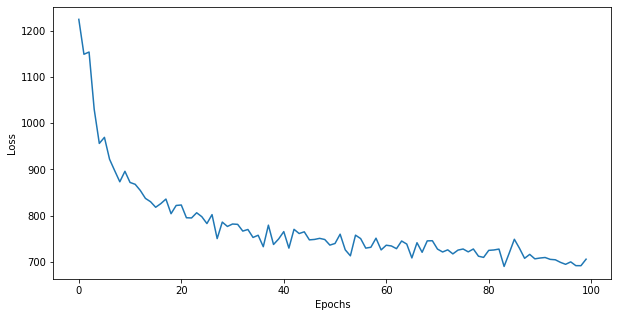

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(range(n_iter), loss['ner'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [51]:
with open('reviews_san-diego_alesmith.txt') as file:
    new_reviews = file.readlines()
new_reviews[:3]

['This place is the real deal. The penultimate craft brewery experience in the San Diego area and up there with the best in all of Southern California. Quality is top notch, variety of offerings is more than enough for several visits, and the food options outside were satisfying (though a tad expensive). Even during the pandemic, it was a vibrant and modern facility and the kind of destination I had expected and hoped for. Been waiting years to finally visit. And they have their own street/address, so you know they’re special.\n',
 'Visited with my wife on a recent trip to San Diego and Los Angeles. Tried the following as part of a flight: AleSmith Evil Dead Red AleSmith Decadence 2017 AleSmith San Diego Pale Ale .394 AleSmith Speedway Stout - Vietnamese Coffee Beers were superb across the board. Also bought some Old Numbskull and Speedway Stout to go; both were phenomenal. Service at the bar was fine as the beertender was quick to grab our drinks. The guy in the retail store was a bit

In [52]:
# Test trained model
for review in new_reviews[:5]:
    doc = nlp(review)
    displacy.render(doc, style="ent")

/Users/chris/opt/anaconda3/envs/brewery-review-nlp/lib/python3.9/site-packages/spacy/displacy/__init__.py:189: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


## Examples from Google Maps

* Mike Hess Brewing, North Park - Modern, family-friendly hangout featuring a tasting room, board games & brewery views.
* North Park Beer Company - Spacious brewery & taproom serving San Diego-style ales & lagers amid dapper decor.
* Rip Current Brewing North Park - This chill, wood-paneled joint with a roomy bar offers pub grub & house-brewed craft beers on tap.

In [53]:
from pprint import pprint

# Create empty dictionary of labels
words = {}
for label in LABELS:
    words[label] = []

# Organize entities into dictionary of labels
doc = nlp(" ".join(new_reviews))
for ent in doc.ents:
    words[ent.label_].append(ent.text)
    
pprint(words)

{'Beer Style': [], 'Descriptor': [], 'Feature': [], 'Geography': []}


In [54]:
import tracery
from tracery.modifiers import base_english

# Inspired by Allison Parrish:
# https://github.com/aparrish/rwet/blob/master/tracery-and-python.ipynb

rules = {
  "origin": "#descriptor.a.capitalize# brewery located in #geography# featuring #feature.a# and serving #beer_style#.",
  "beer_style": words['Beer Style'],
  "feature": words['Feature'],
  "geography": words['Geography'],
  "descriptor": words['Descriptor']
}
grammar = tracery.Grammar(rules)
grammar.add_modifiers(base_english)
for i in range(5):
    print(grammar.flatten("#origin#"))

IndexError: list index out of range

In [55]:
# Let's test with training data (i.e., the most ideal we might expect to get)
doc = nlp(" ".join(reviews))

words = {}
for label in LABELS:
    words[label] = []

for ent in doc.ents:
    words[ent.label_].append(ent.text)
grammar = tracery.Grammar(rules)
grammar.add_modifiers(base_english)

rules = {
  "origin": "#descriptor.a.capitalize# brewery located in #geography# featuring #feature.a# and serving #beer_style#.",
  "beer_style": words['Beer Style'],
  "feature": words['Feature'],
  "geography": words['Geography'],
  "descriptor": words['Descriptor']
}

for i in range(5):
    print(grammar.flatten("#origin#"))

IndexError: list index out of range

Not great, but also not too bad either! Especially only 15 review sample paragraphs.

Further experimentation:

* **Splitting reviews into sentences** might make more sense and produce better results and more samples.
* **MORE REVIEWS!** spaCy recommends a couple hundred to a couple thousand samples for training NER.
* **Parts of speed split** We might also add the "Tagging" pipeline for training since some labels' POS can be slightly different. This might be difficult to accomplish to 100% satisfaction.
* **Streamlit** The final goal is to get this into a Streamlit app where you can input reviews (minimum?) and get a randomized summarization based on a number of different styles of grammar.